# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini diperoleh dari [Kaggle](https://www.kaggle.com/datasets/mrsimple07/obesity-prediction), yang merupakan salah satu repositori data publik terkemuka untuk keperluan pembelajaran mesin dan analisis data.

Dataset ini berjudul "Obesity Prediction Dataset", yang menyediakan koleksi atribut komprehensif terkait demografi individu, kebiasaan gaya hidup, dan indikator kesehatan. Dataset ini dirancang untuk mendukung prediksi prevalensi obesitas, serta menjadi sumber berharga bagi peneliti, data scientist, dan profesional kesehatan yang ingin mengeksplorasi keterkaitan berbagai faktor penyebab obesitas dan mengembangkan strategi intervensi yang efektif.

Dataset ini terdiri dari 1.000 entri dan 7 fitur, yaitu:

- Age: Usia individu (dalam tahun)

- Gender: Jenis kelamin (Male/Female)

- Height: Tinggi badan (dalam cm)

- Weight: Berat badan (dalam kg)

- BMI: Indeks Massa Tubuh

- PhysicalActivityLevel: Tingkat aktivitas fisik (skala ordinal)

- ObesityCategory: Kategori status obesitas (Underweight, Normal weight, Overweight, Obese)

Penggunaan dataset dari sumber terpercaya seperti Kaggle memastikan bahwa data memiliki kualitas yang dapat diandalkan, serta dapat direproduksi dan divalidasi oleh pihak lain untuk kepentingan penelitian atau pembelajaran lanjutan.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Download latest version
path = kagglehub.dataset_download("mrsimple07/obesity-prediction")

print("Path to dataset files:", path)

100%|██████████| 32.0k/32.0k [00:00<00:00, 4.03MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mrsimple07/obesity-prediction/versions/1


In [3]:
os.listdir(path)

['obesity_data.csv']

In [4]:
df = pd.read_csv(path + '/obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memeriksa Struktur Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [6]:
# Ukuran dataset
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Jumlah baris: 1000, Jumlah kolom: 7


In [7]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [8]:
# Jumlah missing value per kolom
missing = df.isnull().sum()
print("Missing values per kolom:\n", missing)

# Persentase missing values
print("Persentase missing values:\n", (df.isnull().mean() * 100).round(2))


Missing values per kolom:
 Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64
Persentase missing values:
 Age                      0.0
Gender                   0.0
Height                   0.0
Weight                   0.0
BMI                      0.0
PhysicalActivityLevel    0.0
ObesityCategory          0.0
dtype: float64


In [9]:
# Apakah ada baris yang duplikat?
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Jika ingin melihat duplikat
df[df.duplicated()]


Jumlah baris duplikat: 0


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory


In [10]:
# Nilai unik dari kolom kategorikal
for col in ['Gender', 'ObesityCategory']:
    print(f"Nilai unik di kolom '{col}': {df[col].unique()}")
    print(df[col].value_counts())
    print()


Nilai unik di kolom 'Gender': ['Male' 'Female']
Gender
Male      523
Female    477
Name: count, dtype: int64

Nilai unik di kolom 'ObesityCategory': ['Normal weight' 'Obese' 'Overweight' 'Underweight']
ObesityCategory
Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: count, dtype: int64



## Visualisasi Data

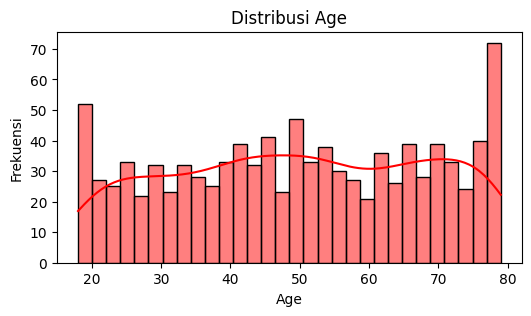

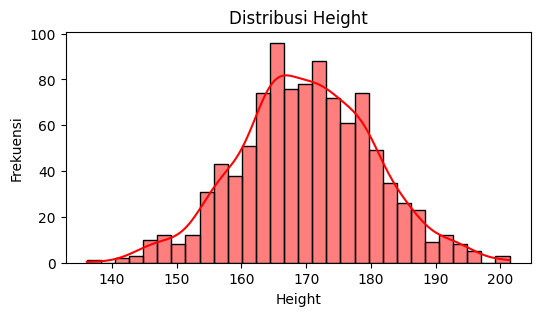

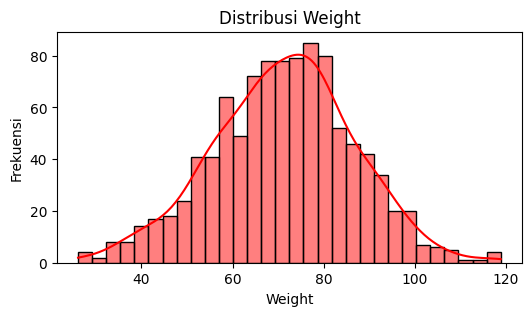

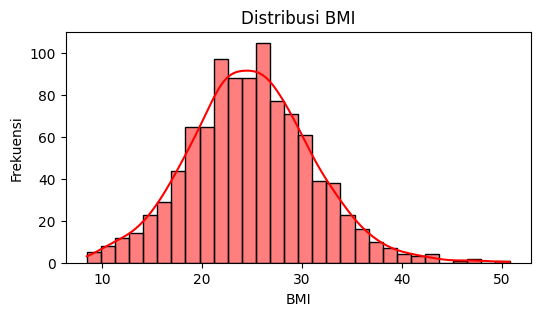

In [11]:
num_cols = ['Age', 'Height', 'Weight', 'BMI']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30, color='red')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()


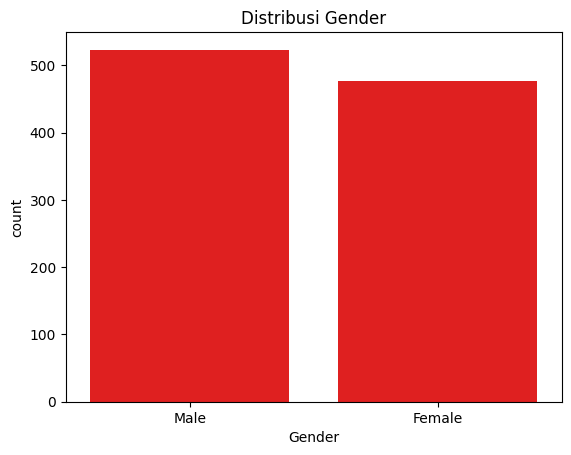

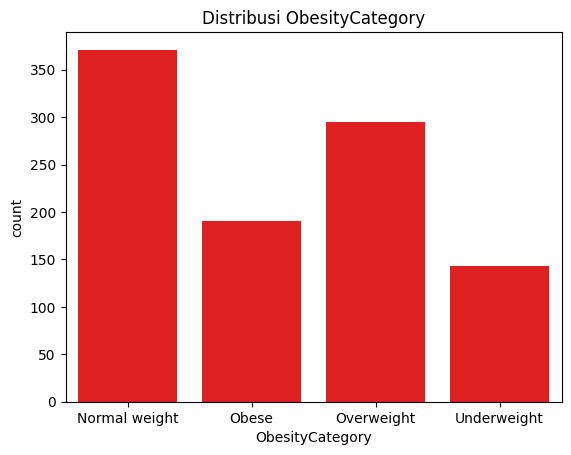

In [12]:
categorical_cols = ['Gender', 'ObesityCategory']
for col in categorical_cols:
    sns.countplot(data=df, x=col, color='red')
    plt.title(f'Distribusi {col}')
    plt.show()


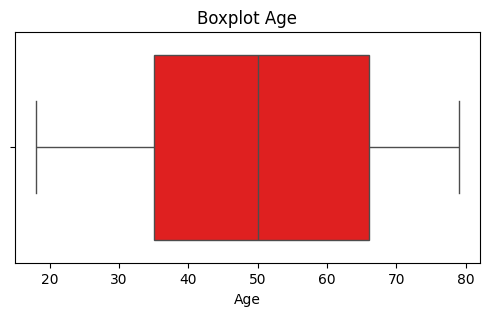

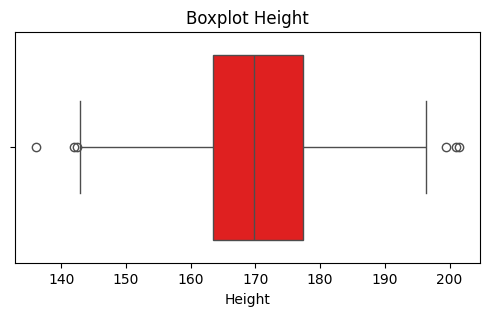

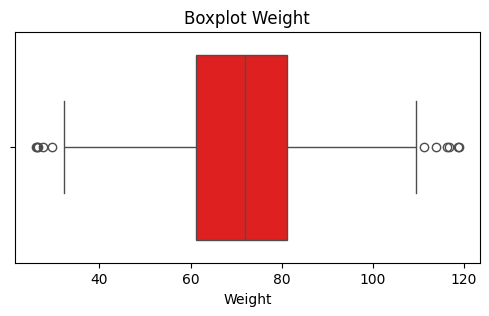

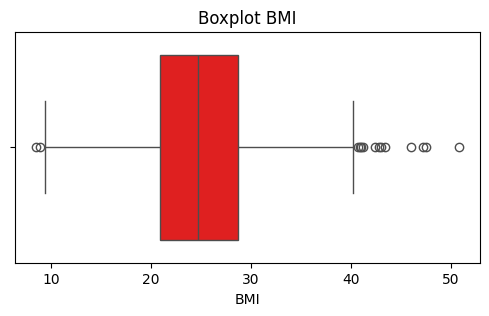

In [13]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color='red')
    plt.title(f'Boxplot {col}')
    plt.show()


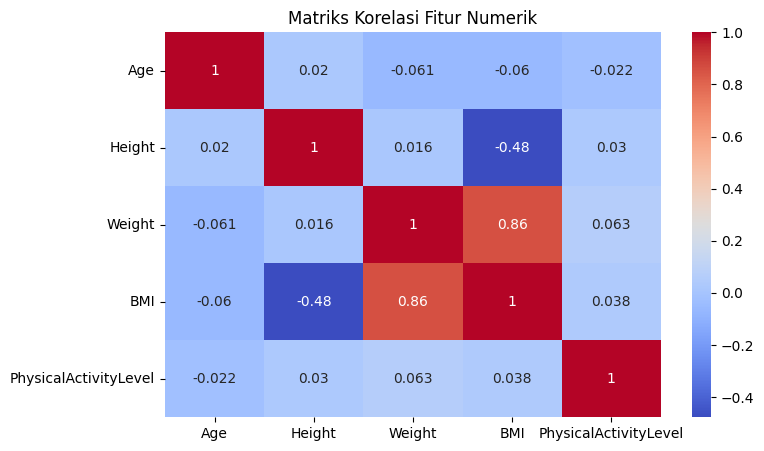

In [14]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()


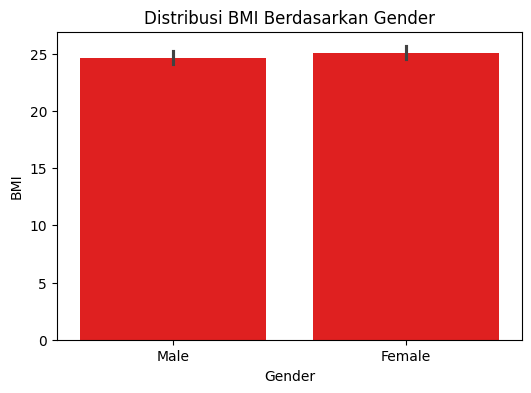

In [15]:
# BMI vs Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='BMI', data=df, color='red')
plt.title('Distribusi BMI Berdasarkan Gender')
plt.show()

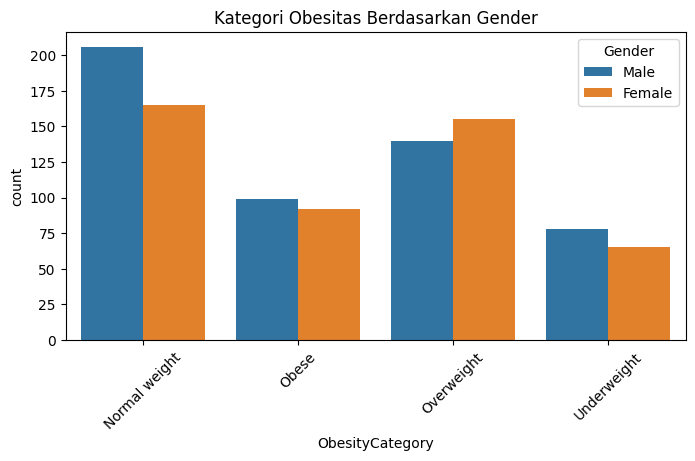

In [16]:
# Distribusi ObesityCategory per Gender
plt.figure(figsize=(8, 4))
sns.countplot(x='ObesityCategory', hue='Gender', data=df)
plt.title('Kategori Obesitas Berdasarkan Gender')
plt.xticks(rotation=45)
plt.show()

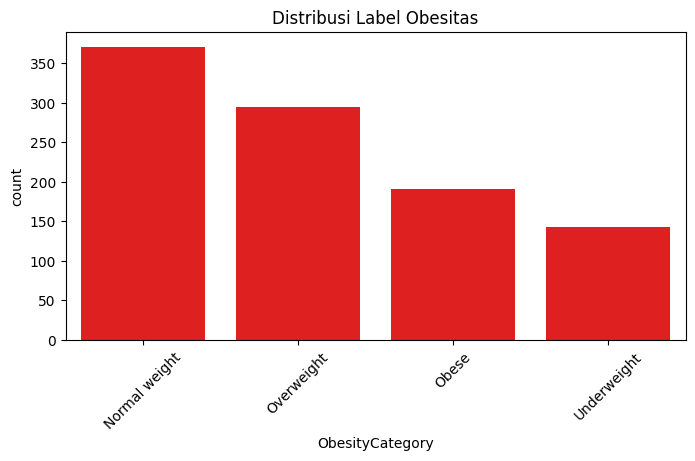

In [27]:
# Distribusi label
plt.figure(figsize=(8, 4))
sns.countplot(x='ObesityCategory', data=df, color='red', order=df['ObesityCategory'].value_counts().index)
plt.title('Distribusi Label Obesitas')
plt.xticks(rotation=45)
plt.show()



### 🧪 Kesimpulan Sementara dari Exploratory Data Analysis (EDA) - Dataset Obesitas

### 📋 1. Informasi Umum Dataset

- Jumlah Baris: **1000**
- Jumlah Kolom: **7**
- Kolom:
  - `Age` (int64)
  - `Gender` (object)
  - `Height` (float64)
  - `Weight` (float64)
  - `BMI` (float64)
  - `PhysicalActivityLevel` (int64)
  - `ObesityCategory` (object)

Dataset tidak mengandung **missing values** maupun **baris duplikat**. Artinya, data telah bersih dan siap digunakan.

---

### 👥 2. Distribusi Gender dan Obesity Category

### Gender
| Gender  | Frekuensi | Persentase |
|---------|-----------|------------|
| Male    | 523       | 52.3%      |
| Female  | 477       | 47.7%      |

### Obesity Category
| Kategori       | Frekuensi | Persentase |
|----------------|-----------|------------|
| Normal weight  | 371       | 37.1%      |
| Overweight     | 295       | 29.5%      |
| Obese          | 191       | 19.1%      |
| Underweight    | 143       | 14.3%      |

> 💡 Kategori `Normal weight` mendominasi. Namun, distribusi label cukup seimbang untuk digunakan dalam klasifikasi.

---

### 📊 3. Statistik Deskriptif

### Ringkasan Statistik

| Fitur | Mean | Std | Min | 25% | 50% | 75% | Max |
|-------|------|-----|-----|-----|-----|-----|-----|
| Age   | 49.86 | 18.11 | 18.0 | 35.0 | 50.0 | 66.0 | 79.0 |
| Height (cm) | 170.05 | 10.31 | 136.12 | 163.51 | 169.80 | 177.35 | 201.42 |
| Weight (kg) | 71.21 | 15.51 | 26.07 | 61.13 | 71.93 | 81.13 | 118.91 |
| BMI   | 24.89 | 6.19 | 8.47 | 20.92 | 24.70 | 28.73 | 50.79 |
| PhysicalActivityLevel | 2.53 | 1.12 | 1 | 2 | 3 | 4 | 4 |

---

### ⚠️ 4. Deteksi Outlier (IQR)

### Outlier per Fitur

- **Age**: ❌ Tidak ada outlier
- **Height**: ✅ 6 outlier
- **Weight**: ✅ 11 outlier
- **BMI**: ✅ 14 outlier

> 💡 Perlu dipertimbangkan apakah outlier akan dihapus atau ditangani dengan metode seperti capping atau transformasi.

---

### 📈 5. Korelasi Antar Variabel

| Fitur X | Fitur Y | Korelasi |
|---------|---------|----------|
| BMI     | Weight  | **0.86** (kuat) |
| BMI     | Height  | 0.48 |
| Weight  | Height  | 0.22 |
| PhysicalActivityLevel | Weight | 0.06 (lemah) |

> 💡 BMI sangat berkorelasi dengan Weight (berat badan), dan cukup dengan Height. Korelasi lainnya lemah.

---

### 👩‍🔬 6. Perbandingan Gender vs BMI

| Gender  | Mean BMI | STD | Min | Max |
|---------|----------|-----|-----|-----|
| Male    | 24.68     | 6.39 | 8.47 | 50.79 |
| Female  | 25.12     | 5.97 | 9.35 | 47.56 |

Distribusi ObesityCategory per Gender:

| Gender | Underweight | Normal | Overweight | Obese |
|--------|-------------|--------|------------|-------|
| Male   | 14.9%       | 39.4%  | 26.8%      | 18.9% |
| Female | 13.6%       | 34.6%  | 32.5%      | 19.3% |

> 💡 Perempuan sedikit lebih banyak di kategori Overweight, sedangkan laki-laki sedikit lebih banyak di kategori Normal dan Underweight.

---

### ✅ 7. Insight Utama

- Dataset **tidak memiliki missing values** dan **tidak ada duplikasi**.
- **BMI, Weight, dan Height** adalah fitur numerik yang paling signifikan dan berkorelasi.
- **Gender** mempengaruhi distribusi BMI dan kategori obesitas.
- **Outlier** cukup banyak ditemukan pada Height, Weight, dan BMI → perlu ditangani saat preprocessing.
- Distribusi target (ObesityCategory) cukup seimbang untuk modeling.

---

### 🚀 Langkah Selanjutnya
- Preprocessing data:
  - Encoding kategori (`Gender`, `ObesityCategory`)
  - Scaling fitur numerik
  - Penanganan outlier
  - Pembagian dataset (train/test split)
- Pembuatan file **`automate_preprocessing.py`** untuk otomatisasi preprocessing
- Implementasi GitHub Actions untuk pipeline otomatis

---




# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Menangangi Outlier

In [38]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [39]:
for col in ['Height', 'Weight', 'BMI']:
    df = remove_outliers_iqr(df, col)

print("Ukuran dataset setelah outlier:", df.shape)

Ukuran dataset setelah outlier: (970, 7)


## Label Encoding

In [32]:
X = df.drop('ObesityCategory', axis=1)
y = df['ObesityCategory']

In [33]:
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])  # Male=1, Female=0

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)  # Simpan label encoder untuk decoding nanti

## Feature Scaling

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Pembagian Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [37]:
# ✅ Output ringkasan
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Distribusi label (train):", np.bincount(y_train))
print("Distribusi label (test):", np.bincount(y_test))

Shape X_train: (777, 6)
Shape X_test: (195, 6)
Distribusi label (train): [297 139 234 107]
Distribusi label (test): [74 35 59 27]
